In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai.structured import *
from fastai.column_data import *

PATH = 'data/hackerearth-zs/'

In [2]:
import pandas as pd

In [3]:
df_given = pd.read_csv(PATH+'yds_train2018.csv',low_memory=False)

In [4]:
df_given.head()

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,1,ar00001,1,Argentina,157500.0
1,2,2013,1,1,ar00003,1,Argentina,39375.0
2,3,2013,1,1,ar00004,1,Argentina,15750.0
3,4,2013,1,1,ar00007,1,Argentina,47250.0
4,5,2013,1,1,ar00008,1,Argentina,283500.0


In [5]:
len(df_given)

79072

In [6]:
df_given.drop('Week',inplace=True,axis=1)

In [7]:
df_given.head()

,S_No,Year,Month,Merchant_ID,Product_ID,Country,Sales
0,1,2013,1,ar00001,1,Argentina,157500.0
1,2,2013,1,ar00003,1,Argentina,39375.0
2,3,2013,1,ar00004,1,Argentina,15750.0
3,4,2013,1,ar00007,1,Argentina,47250.0
4,5,2013,1,ar00008,1,Argentina,283500.0


In [8]:
df_given.drop('Merchant_ID',inplace=True,axis=1)

In [9]:
df_temp = df_given.groupby(['Year','Month','Product_ID','Country']).sum().reset_index()


In [10]:
df_temp.head()

,Year,Month,Product_ID,Country,S_No,Sales
0,2013,1,1,Argentina,15931,34346025.00
1,2013,1,1,Columbia,6536745,3947356.31
2,2013,1,2,Argentina,364805,2751851.48
3,2013,1,2,Belgium,280368,314850.13
4,2013,1,2,Columbia,11298201,2885137.06


In [11]:
df_temp.drop('S_No',inplace=True,axis=1)

In [12]:
df_temp.head()

,Year,Month,Product_ID,Country,Sales
0,2013,1,1,Argentina,34346025.00
1,2013,1,1,Columbia,3947356.31
2,2013,1,2,Argentina,2751851.48
3,2013,1,2,Belgium,314850.13
4,2013,1,2,Columbia,2885137.06


In [13]:
df_temp.to_csv(PATH+'2-Training.csv')

In [14]:
df_given_expenses = pd.read_csv(PATH+'promotional_expense_1.csv',low_memory=False)

In [15]:
df_joined = pd.merge(df_temp,df_given_expenses,how='left',left_on=['Year','Month','Country','Product_ID'],right_on=['Year','Month','Country','Product_ID'])

In [16]:
df_joined.head()

,Year,Month,Product_ID,Country,Sales,Expense_Price
0,2013,1,1,Argentina,34346025.00,14749.307
1,2013,1,1,Columbia,3947356.31,1893.122
2,2013,1,2,Argentina,2751851.48,1329.374
3,2013,1,2,Belgium,314850.13,249.590
4,2013,1,2,Columbia,2885137.06,1436.726


In [17]:
df_joined.to_csv(PATH+'2-Training.csv')

In [18]:
df_joined['Month'] = (df_joined['Year']-2013)*12 + df_joined['Month']

In [19]:
df_joined.to_csv(PATH+'2-Training.csv')

In [20]:
df_joined.drop('Year',inplace=True,axis=1)

In [21]:
df_joined.to_csv(PATH+'2-Training.csv')

In [22]:
cat_vars=['Product_ID','Country']
cont_vars = ['Month','Sales','Expense_Price']

In [23]:
df_joined.fillna(0)

,Month,Product_ID,Country,Sales,Expense_Price
0,1,1,Argentina,3.434602e+07,14749.307
1,1,1,Columbia,3.947356e+06,1893.122
2,1,2,Argentina,2.751851e+06,1329.374
3,1,2,Belgium,3.148501e+05,249.590
4,1,2,Columbia,2.885137e+06,1436.726
5,1,2,Denmark,1.018476e+08,43843.906
6,1,4,England,1.669076e+05,183.482
7,1,4,Finland,1.515342e+07,750.618
8,1,5,England,4.623706e+05,330.367
9,2,1,Argentina,3.200558e+07,12187.566


In [24]:
for v in cat_vars:
    df_joined[v] = df_joined[v].astype('category').cat.as_ordered()

In [25]:
for v in cont_vars:
    df_joined[v] = df_joined[v].astype('float32')

In [26]:
n = len(df_joined); n

388

In [27]:
idxs = get_cv_idxs(n, val_pct=0.2)


In [28]:
idxs

array([271,  46, 167,  42, 349, 181, 153,  33, 116, 148, 376, 284, 104,  57, 198, 114,  15, 218,  84,   0,
       384, 152,  73, 168, 360,  77, 318, 342,  76, 299, 237,   9, 335, 296,  55, 163,  25, 386,  82, 139,
       141, 173,  90, 126,  39, 336, 258, 301, 208, 180, 347,  56,  22,  31, 113, 280,  94,  72,  30, 203,
       165, 250, 317, 265, 314,   5,  45, 322, 368, 155, 357,  78, 110,   3,  18,  93, 108])

In [29]:
df, y,nas, mapper = proc_df(df_joined, 'Sales', do_scale=True)

In [30]:
ylog = np.log(y)

In [31]:
for c in cat_vars:
    df[c]= df[c].astype('category').cat.as_ordered()

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
((val,trn), (y_val,y_trn)) = split_by_idx(idxs, df.values, ylog)

In [34]:
m = RandomForestRegressor(n_estimators=20)
m.fit(trn, y_trn);

In [35]:
preds = m.predict(val)


In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [37]:
m.score(trn, y_trn), m.score(val, y_val), mean_absolute_percentage_error(y_val, preds)

(0.9952107298093047, 0.9912321791512797, 0.5319903432494896)

In [38]:
y_val[1:10]

array([12.65985, 18.43899, 17.28142, 11.85428, 17.29767, 14.85285, 17.15544, 13.04237, 14.96274],
      dtype=float32)

In [39]:
preds[1:10]

array([12.56812, 18.41259, 17.3225 , 11.88682, 17.32709, 14.88257, 17.09481, 13.00717, 14.94278])

In [40]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

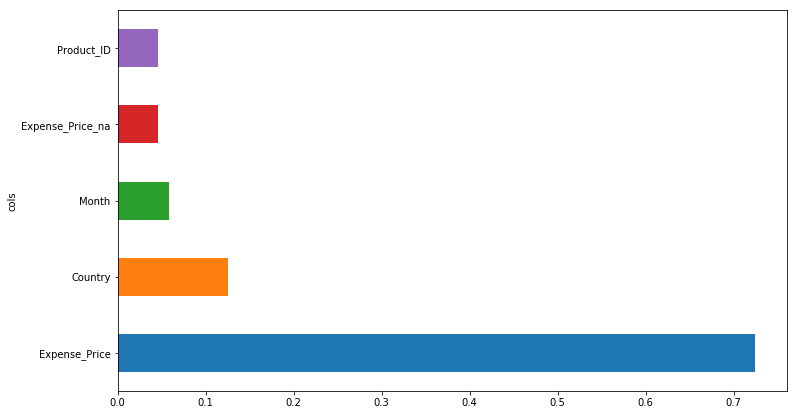

In [41]:
fi = rf_feat_importance(m, df)
plot_fi(fi);

In [42]:
df_test = pd.read_csv(PATH+'yds_test2018.csv',low_memory=False)

df_test.head()

df_given.head()

df_test.drop(['S_No'],inplace=True,axis=1)

In [43]:
df_test.head()

,Year,Month,Product_ID,Country,Sales
0,2016,4,1,Argentina,9.038013e+06
1,2016,5,1,Argentina,1.060612e+07
2,2016,6,1,Argentina,1.116689e+07
3,2016,7,1,Argentina,7.112865e+06
4,2016,8,1,Argentina,1.148945e+07


In [44]:
df_test['Month'] = (df_test['Year']-2013)*12 + df_test['Month']

In [45]:
df_test.head()

,Year,Month,Product_ID,Country,Sales
0,2016,40,1,Argentina,9.038013e+06
1,2016,41,1,Argentina,1.060612e+07
2,2016,42,1,Argentina,1.116689e+07
3,2016,43,1,Argentina,7.112865e+06
4,2016,44,1,Argentina,1.148945e+07


In [46]:
df_test.drop('Year',inplace=True,axis=1)

In [47]:
df_test.head()

,Month,Product_ID,Country,Sales
0,40,1,Argentina,9.038013e+06
1,41,1,Argentina,1.060612e+07
2,42,1,Argentina,1.116689e+07
3,43,1,Argentina,7.112865e+06
4,44,1,Argentina,1.148945e+07


In [48]:
df_given_expenses.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [49]:
df_given_expenses['Month']= (df_given_expenses['Year']-2013)*12 + df_given_expenses['Month']

In [50]:
df_given_expenses.drop('Year',inplace=True,axis=1)

In [51]:
df_given_expenses.head()

,Month,Country,Product_ID,Expense_Price
0,1,Argentina,1,14749.307
1,1,Argentina,2,1329.374
2,1,Belgium,2,249.590
3,1,Columbia,1,1893.122
4,1,Columbia,2,1436.726


In [52]:
df_test_joined = pd.merge(df_test,df_given_expenses,how='left',left_on=['Month','Country','Product_ID'],right_on=['Month','Country','Product_ID'])


In [53]:
df_test_joined.head()

,Month,Product_ID,Country,Sales,Expense_Price
0,40,1,Argentina,9.038013e+06,8214.875
1,41,1,Argentina,1.060612e+07,10777.878
2,42,1,Argentina,1.116689e+07,10320.673
3,43,1,Argentina,7.112865e+06,7377.587
4,44,1,Argentina,1.148945e+07,9805.705


In [54]:
df_test_joined.to_csv(PATH+'2-testing.csv')

In [55]:
for c in cat_vars:
    df_test_joined[c]= df_test_joined[c].astype('category').cat.as_ordered()

In [56]:
for v in cont_vars:
    df_test_joined[v] = df_test_joined[v].astype('float32')

In [57]:
df_test,y_test,nas,mapper = proc_df(df_test_joined,'Sales',do_scale=True)

In [58]:
df_test.head()

,Month,Product_ID,Country,Expense_Price,Expense_Price_na
0,-0.914851,1,1,-0.099210,-0.246183
1,-0.690936,1,1,0.018069,-0.246183
2,-0.467022,1,1,-0.002852,-0.246183
3,-0.243107,1,1,-0.137523,-0.246183
4,-0.019192,1,1,-0.026416,-0.246183


In [59]:
predictions = m.predict(df_test)

In [60]:
df_test_joined['Sales']=predictions

In [61]:
df_test_joined.to_csv(PATH+'3-results.csv')

In [62]:
actual_preds = np.exp(predictions)

In [63]:
df_test_joined['Sales']=actual_preds

In [64]:
df_test_joined.to_csv(PATH+'3-results.csv')

In [65]:
df_test_joined.head()

,Month,Product_ID,Country,Sales,Expense_Price
0,40.0,1,Argentina,8.636540e+06,8214.875000
1,41.0,1,Argentina,1.240826e+07,10777.877930
2,42.0,1,Argentina,1.283284e+07,10320.672852
3,43.0,1,Argentina,7.178617e+06,7377.586914
4,44.0,1,Argentina,1.356948e+07,9805.705078
